Визуализацию рассматриваем на основе данных об арендном жилье в Нью-Йорке на Airbnb

In [16]:
# импортируем библиотеки, которые нам понадобятся для работы с датафреймом, кластеризацией и визуализацией
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("https://lms.skillfactory.ru/assets/courseware/v1/9caef4a5796fbb2648250dada760f4d6/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/airbnb.zip")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Рассматриваем датасет на основе признаков широты и долготы, а так же цены.

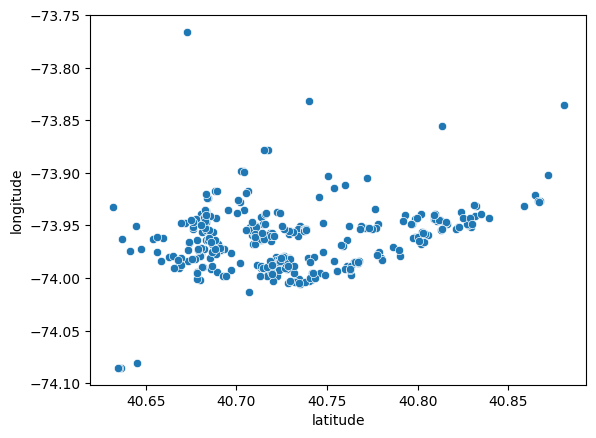

In [17]:
sns.scatterplot(x=df.latitude, y=df.longitude);

### ДИАГРАММА РАССЕЯНИЯ

In [18]:
# help(KMeans)

In [19]:
# инициализируем k-means кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6, n_init='auto', random_state=42)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df['clusters'] = predictions

# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме

In [20]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,40.677772,-73.967266,#81DF20
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,40.724551,-73.978223,#2095DF
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,40.828515,-73.936281,#DF2020
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,40.677772,-73.967266,#81DF20
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,5,40.780105,-73.964624,#DF8520


Можно просто визуализировать полученные кластеры, передав в переменную информацию о том, какой элемент к какому кластеру принадлежит. В таком случае Seaborn будет автоматически подбирать цвета для кластеров:

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

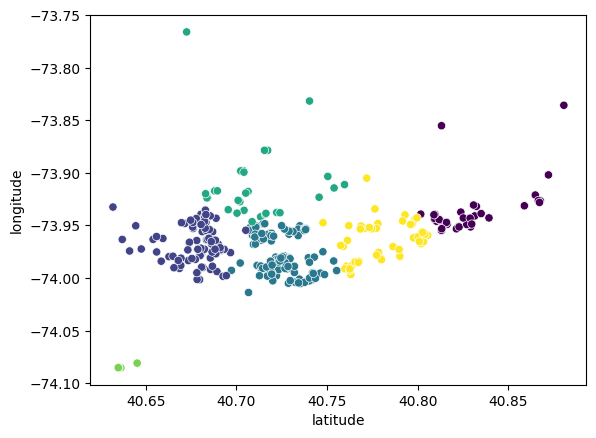

In [36]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.clusters)

Если мы хотим задать определённые цвета для кластеров, в переменную c передадим столбец с заданными цветами:

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

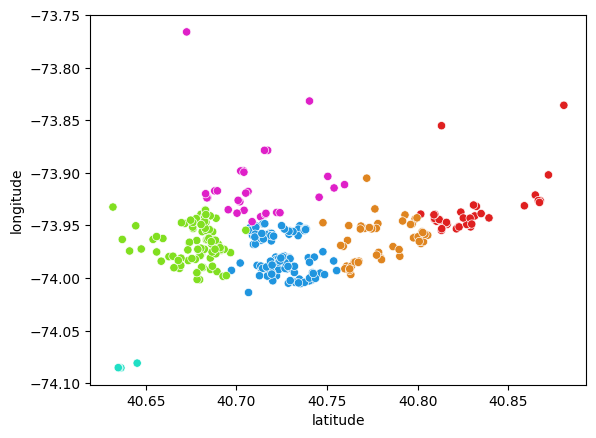

In [22]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color)

Если точек слишком много или мало, может понадобиться уменьшить или увеличить их размер. В этом поможет переменная s.

Также могут встретиться перекрывающиеся кластеры — а таком случае нужно, чтобы цвета объектов в кластере были полупрозрачными. В этом поможет переменная alpha: чем ближе её значение к 1, тем менее прозрачны объекты на графике.

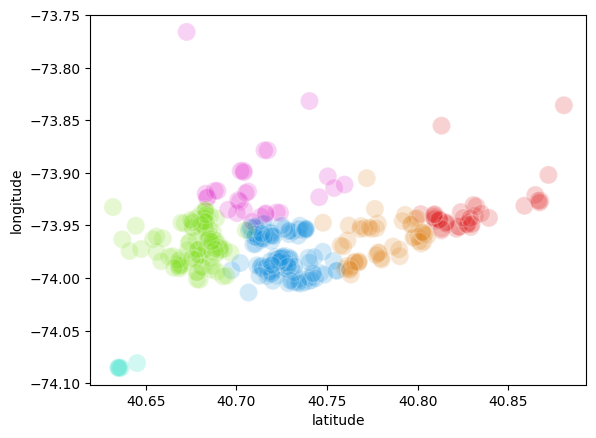

In [23]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.2, s=170);

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

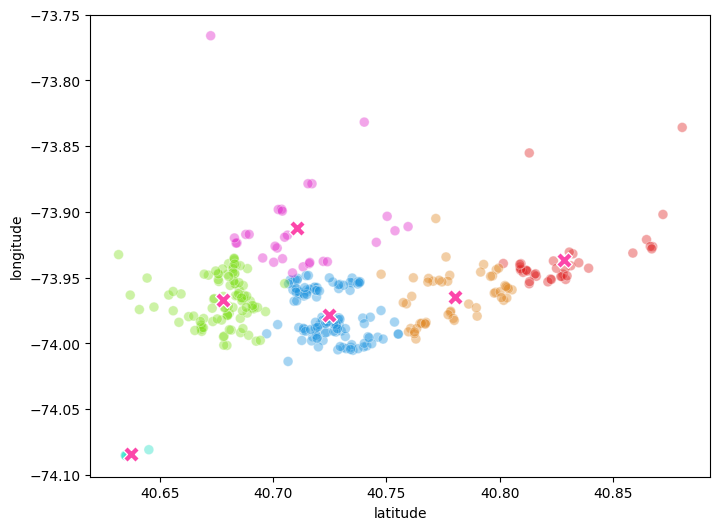

In [24]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.4, s=50);
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

### CONVEX HULL

Выпуклая оболочка (Convex Hull) множества точек — это такое выпуклое множество точек, в котором лежат все точки фигуры.

Для построения выпуклой оболочки каждого кластера воспользуемся библиотекой Scipy и классом ConvexHull.

In [25]:
from scipy.spatial import ConvexHull

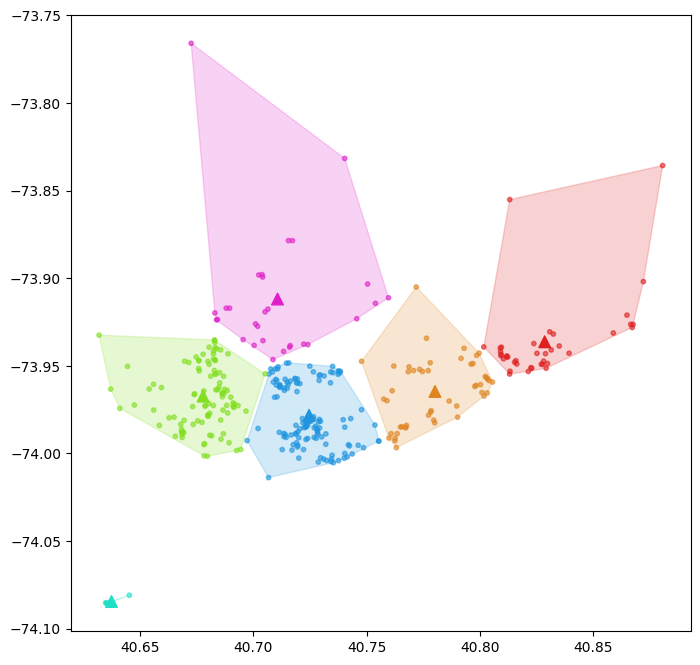

In [26]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдем уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы принадлежащие i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # запишем координаты оболочки по оси x. Из hull.vertices мы узнаем индексы элементов, входящих в оболочку
    # так как оболочка должна быть замкнутой, то в конце добавляем еще раз нулевой элемент
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем ее таким же цветом как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])
        

### ДЕНДРОГРАММА

Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

Наиболее важные переменные, которые принимает функция dendrogram:

`Z` — расстояния до объектов кластеров, полученные из функции `linkage`.  
`orientation` — ориентация дендрограммы. Данный параметр может принимать значения `top`, `bottom`, `left`, `right`.  
`labels` — список с предсказаниями, к какому кластеру какой объект относится.   
`distance_sort` — определяет, в каком порядке будут визуализированы кластеры: `ascending` или `True` означает, что сначала отрисовывается пара кластеров с максимальным расстоянием между ними; 
  `descending` или `False` — что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.  

Запускаем агломеративную кластеризацию

In [27]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

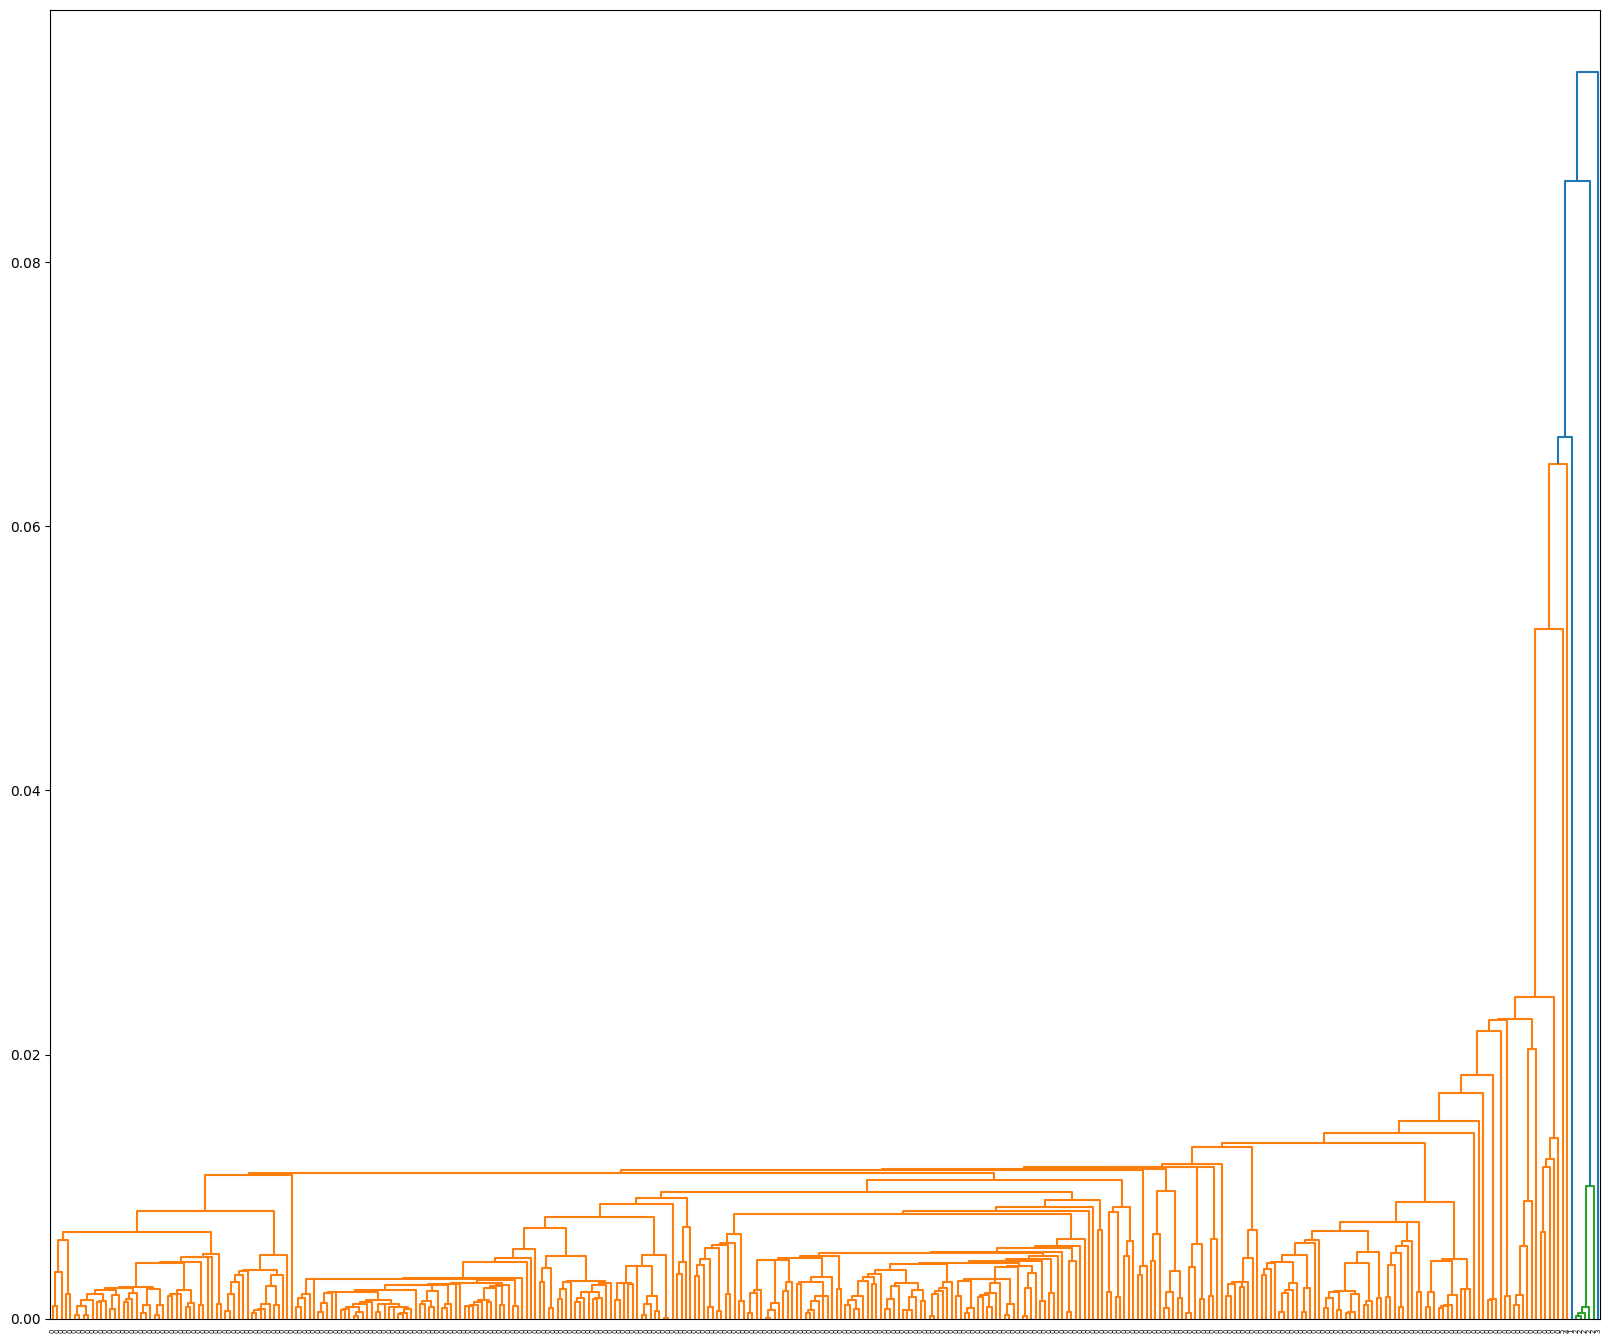

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

### CLUSTERGRAM

In [29]:
from clustergram import Clustergram

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.007506847381591797 seconds.
K=3 fitted in 0.007508277893066406 seconds.
K=4 fitted in 0.00909566879272461 seconds.
K=5 fitted in 0.008003473281860352 seconds.
K=6 fitted in 0.009506464004516602 seconds.
K=7 fitted in 0.009508132934570312 seconds.
K=8 fitted in 0.00951075553894043 seconds.


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

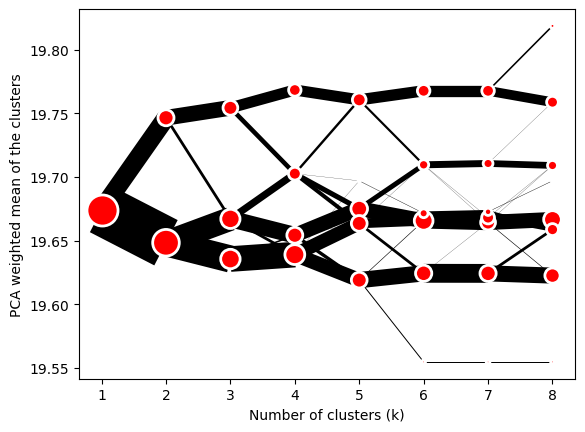

In [30]:
# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans', n_init='auto')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

### 3D-ВИЗУАЛИЗАЦИЯ

In [31]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6, n_init='auto')

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

Визуализация с помощью библиотеки Matplotlib:

Text(0.5, 0, 'price')

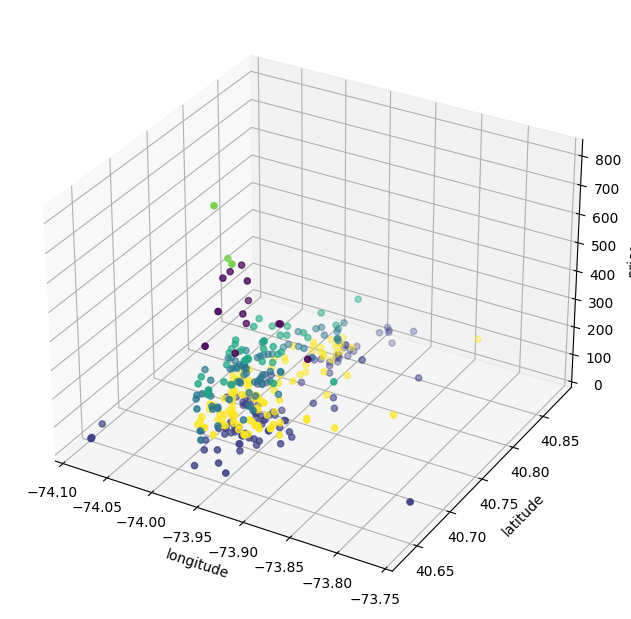

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Изменим угол визуализации: 

Text(0.5, 0, 'price')

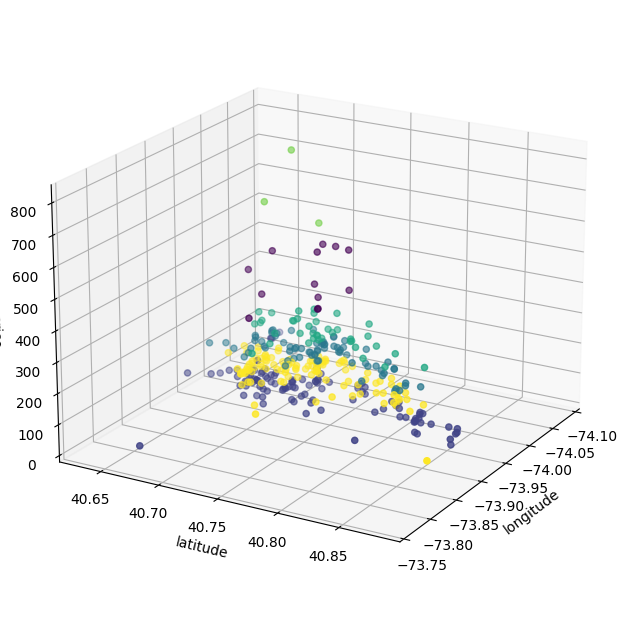

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(xs=df.longitude.to_list(), ys=df.latitude.to_list(), zs=df.price.to_list(), c=df.clusters_3d)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [34]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

Задание 8.4

расстояние между кластерами - полная связь linkage='complete'  
направление дендрограммы - top

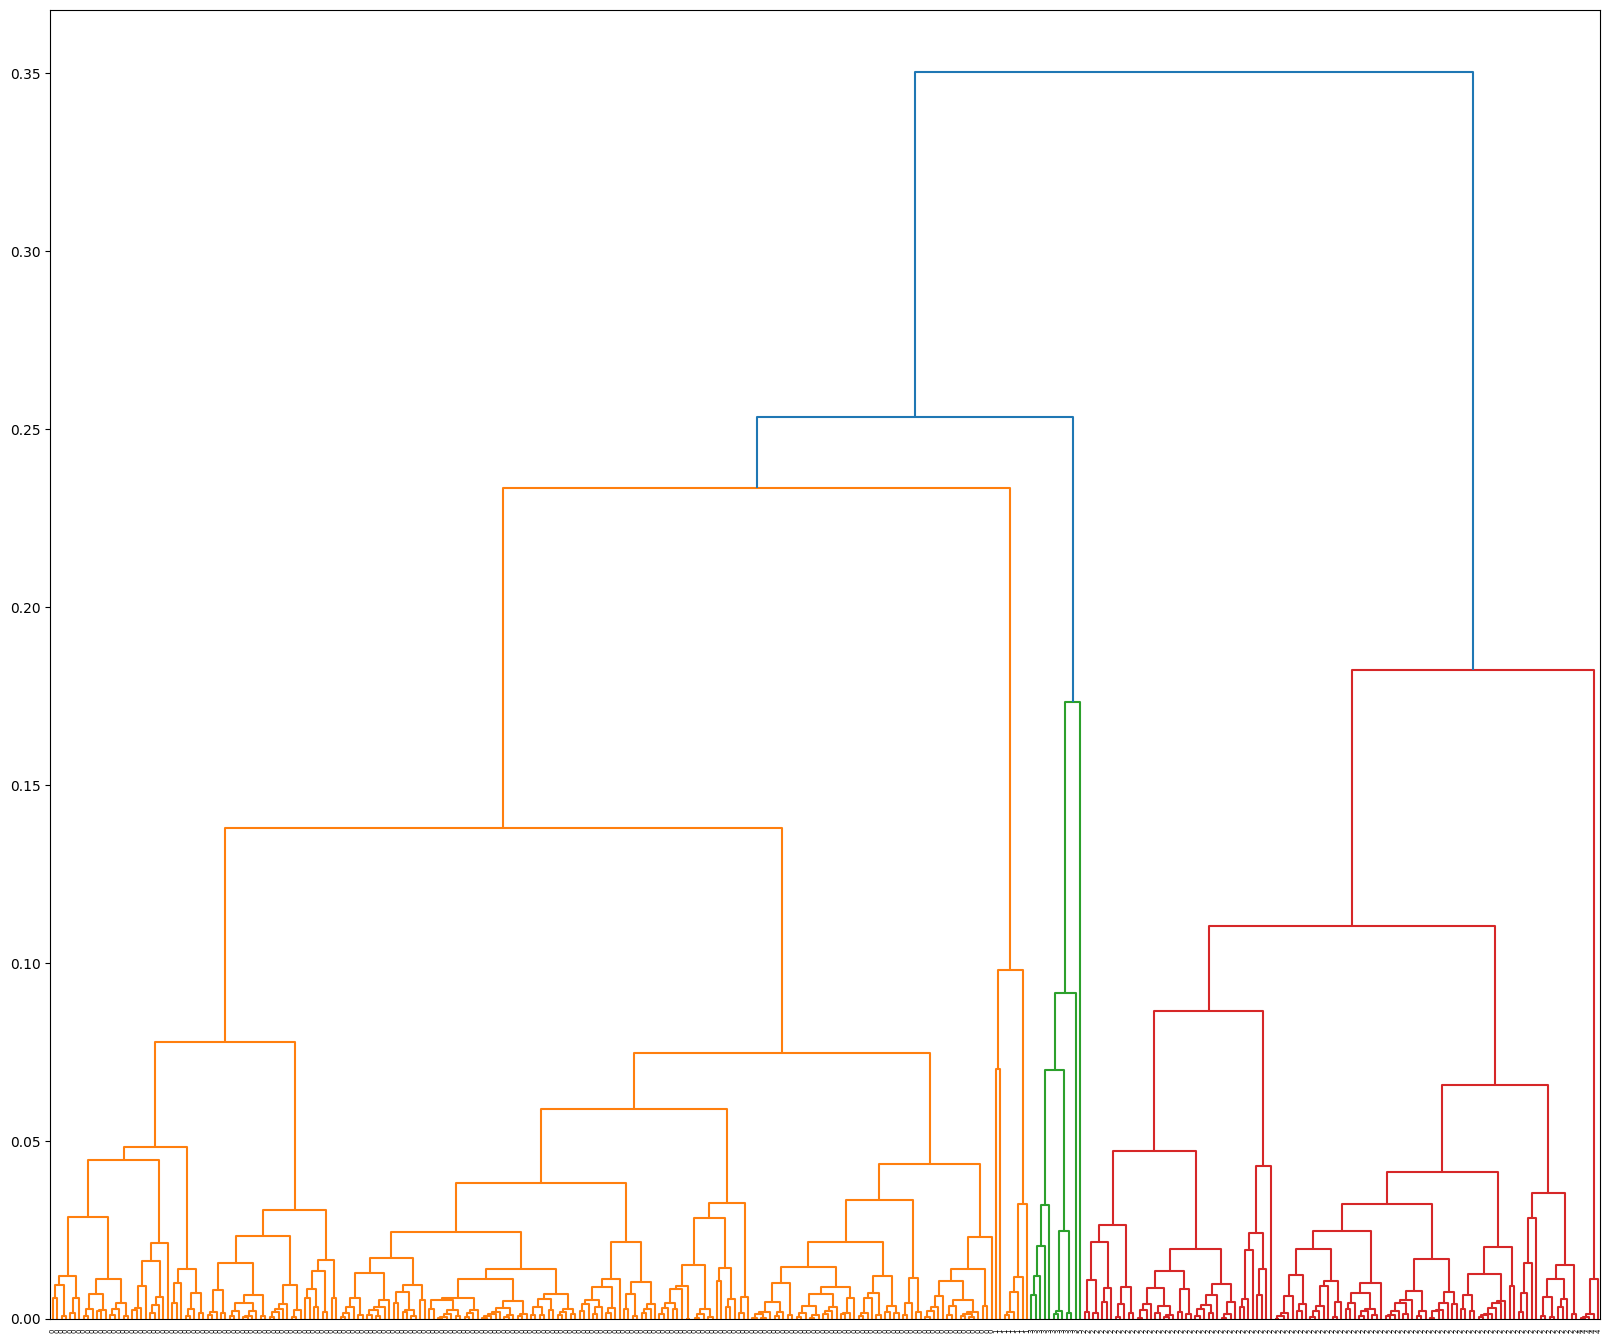

In [35]:
# импортируем 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'complete')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

Задание 8.5

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

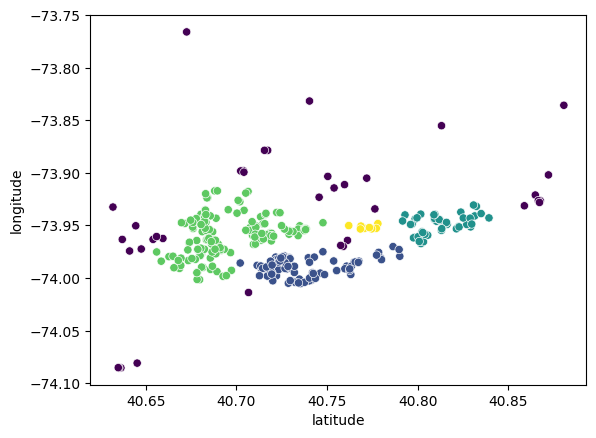

In [40]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.012, min_samples=6)
clustering.fit(df[['latitude', 'longitude']])
clustering_prediction = clustering.labels_

df['dbscan_clust'] = clustering_prediction

sns.scatterplot(data=df, x='latitude', y='longitude', c=clustering_prediction)

In [42]:
clustering_prediction

array([-1,  0,  1,  2,  1,  0,  2,  0,  1,  0,  1,  0,  2,  1,  0,  2,  2,
        0,  2,  1,  2,  2,  2,  2,  2,  2, -1,  0, -1,  0,  1,  1,  2,  1,
        2,  2,  2,  2, -1,  0,  0,  2,  2,  0,  1, -1,  2,  2,  2,  2,  2,
        0,  2,  2,  0,  2,  0,  0,  2,  0,  2,  0,  3,  2,  2,  0,  2,  0,
        2,  0,  1,  0,  0,  1,  2,  0,  3, -1,  2,  0,  2,  1,  0, -1,  0,
        2,  2,  0,  0,  2,  2,  2,  2,  2,  2,  2,  1,  1,  0,  2,  1,  2,
        1,  0,  2,  2,  2,  2,  1,  2,  0,  2,  0,  2,  0,  0,  2,  0,  0,
        2,  1,  2,  0,  0, -1,  2,  3, -1,  2,  1,  2,  0,  2,  0,  0,  0,
       -1,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  0,  2,  2,  0,  2,  2,
        2,  1,  0,  2,  3,  2,  3,  2, -1,  2,  0, -1,  2,  1,  2,  2, -1,
        2,  1,  2,  0, -1,  2,  0,  1,  0,  1,  2, -1,  1,  2,  2,  2,  2,
        3,  2,  0,  0,  0,  2,  3,  0,  0, -1,  0,  2, -1, -1, -1,  2,  0,
        1,  2,  1,  1,  1,  2,  2,  0,  0,  2,  2,  0,  2,  1, -1,  2,  0,
        0,  0,  0,  1,  1

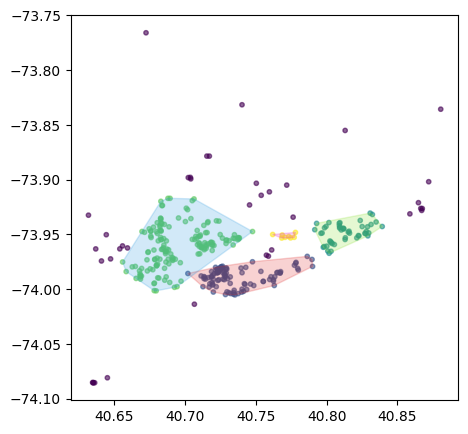

In [46]:
fig, ax = plt.subplots(1, figsize=(5,5))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=clustering_prediction, alpha = 0.6, s=10)
# plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдем уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.dbscan_clust.unique():
    if i >= 0:
        # запишем в points значения признаков широты и долготы принадлежащие i-му кластеру
        points = df[df.dbscan_clust == i][['latitude', 'longitude']].values
    
        hull = ConvexHull(points)
        
        # запишем координаты оболочки по оси x. Из hull.vertices мы узнаем индексы элементов, входящих в оболочку
        # так как оболочка должна быть замкнутой, то в конце добавляем еще раз нулевой элемент
        x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
        y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
        
        # рисуем оболочку и заливаем ее таким же цветом как и объекты кластера
        plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])